# Module 00 — AC vs DC and Signals
## AC vs DC, Frequency, Amplitude, Using Your Oscilloscope

---

**What you'll learn:**
- The difference between DC and AC signals
- Sinusoidal waveforms: amplitude, frequency, period, phase
- Other waveforms: square, triangle, sawtooth
- RMS vs peak voltage — why your multimeter reads differently than your oscilloscope
- How to use an oscilloscope (what the axes mean, triggering, coupling)
- How to use your signal generator

**Equipment needed:** Fnirsi 2C53T oscilloscope + signal generator, bench power supply (0–30V), Klein MM300 multimeter, BNC cable / probes, breadboard.

In [7]:
# Setup — run this cell first
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
%matplotlib inline

plt.rcParams.update({
    'figure.figsize': (10, 5),
    'axes.grid': True,
    'font.size': 12,
    'lines.linewidth': 2,
    'grid.alpha': 0.3,
})
print("Setup complete.")

Setup complete.


---
## 1. DC — Direct Current

### Concept

**DC (Direct Current)** means voltage and current are constant over time. When you set your bench supply to 5V, it outputs 5V continuously — that's DC.

Sources of DC:
- Batteries
- Bench power supplies
- Voltage regulators (convert AC or higher DC to stable DC)
- Solar cells

Most electronic circuits (microcontrollers, ICs, LEDs) run on DC. The entire digital world runs on DC.

### The Material Science Why

In a DC circuit, the electric field inside the conductor points in one direction and has a constant magnitude. Electrons drift steadily in the opposite direction. There's nothing oscillating, nothing reversing. The battery's chemical reaction maintains a steady potential difference, and current flows continuously from the negative terminal through the circuit to the positive terminal (electron flow) or equivalently from + to - (conventional current).

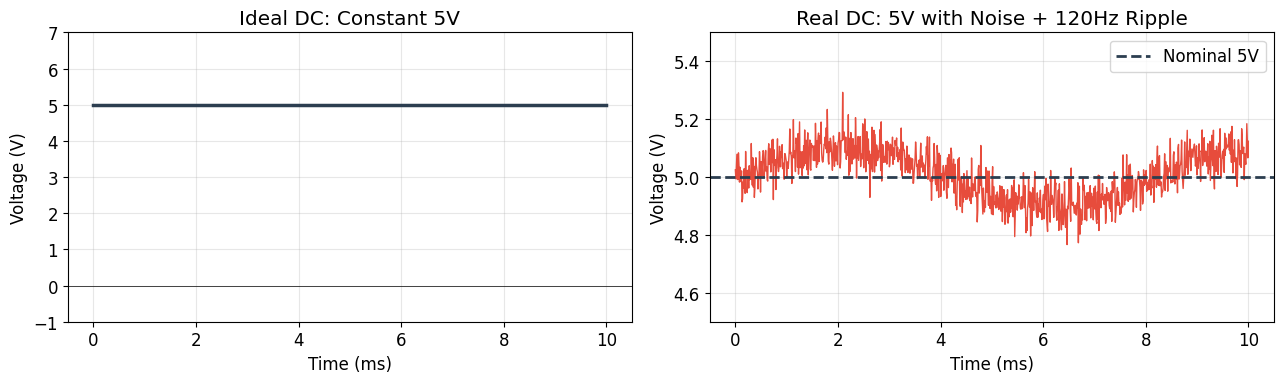

Real DC power supplies have small amounts of noise and ripple.
Ripple at 120Hz is common — it comes from rectifying 60Hz AC mains.


In [8]:
# --- DC Signal Visualization ---

t = np.linspace(0, 0.01, 1000)  # 10 ms

fig, axes = plt.subplots(1, 2, figsize=(13, 4))

# Ideal DC
V_dc = np.full_like(t, 5.0)
axes[0].plot(t * 1000, V_dc, color='#2c3e50', linewidth=2.5)
axes[0].set_xlabel('Time (ms)')
axes[0].set_ylabel('Voltage (V)')
axes[0].set_title('Ideal DC: Constant 5V')
axes[0].set_ylim(-1, 7)
axes[0].axhline(y=0, color='black', linewidth=0.5)

# Real DC (with noise/ripple)
np.random.seed(42)
noise = 0.05 * np.random.randn(len(t))
ripple = 0.1 * np.sin(2 * np.pi * 120 * t)  # 120Hz ripple from rectifier
V_real = 5.0 + noise + ripple
axes[1].plot(t * 1000, V_real, color='#e74c3c', linewidth=1)
axes[1].axhline(y=5.0, color='#2c3e50', linestyle='--', label='Nominal 5V')
axes[1].set_xlabel('Time (ms)')
axes[1].set_ylabel('Voltage (V)')
axes[1].set_title('Real DC: 5V with Noise + 120Hz Ripple')
axes[1].set_ylim(4.5, 5.5)
axes[1].legend()

plt.tight_layout()
plt.show()
print("Real DC power supplies have small amounts of noise and ripple.")
print("Ripple at 120Hz is common — it comes from rectifying 60Hz AC mains.")

---
## 2. AC — Alternating Current

### Concept

**AC (Alternating Current)** means the voltage and current periodically reverse direction. The most common AC waveform is the **sine wave** — this is what comes out of your wall outlet.

Key parameters of a sine wave:

$$v(t) = V_{\text{peak}} \cdot \sin(2\pi f t + \phi)$$

| Parameter | Symbol | Meaning |
|-----------|--------|---------|
| **Amplitude (Peak)** | $V_{\text{peak}}$ or $V_p$ | Maximum voltage from zero |
| **Peak-to-Peak** | $V_{pp}$ | Total swing = $2 \times V_{peak}$ |
| **Frequency** | $f$ | Cycles per second (Hz) |
| **Period** | $T = 1/f$ | Time for one complete cycle |
| **Phase** | $\phi$ | Time offset in radians |

**US mains power:** 120V RMS, 60Hz → $V_{peak} = 120\sqrt{2} \approx 170\text{V}$, $T = 1/60 \approx 16.7\text{ms}$

### The Material Science Why

In AC, the electric field inside the conductor reverses direction every half-cycle. Electrons oscillate back and forth — they don't actually travel from the power plant to your house. Energy is transferred by the electromagnetic wave propagating through the conductor, not by the electrons themselves moving long distances. AC was adopted for power distribution because transformers (which only work with AC) allow efficient voltage conversion for long-distance transmission.

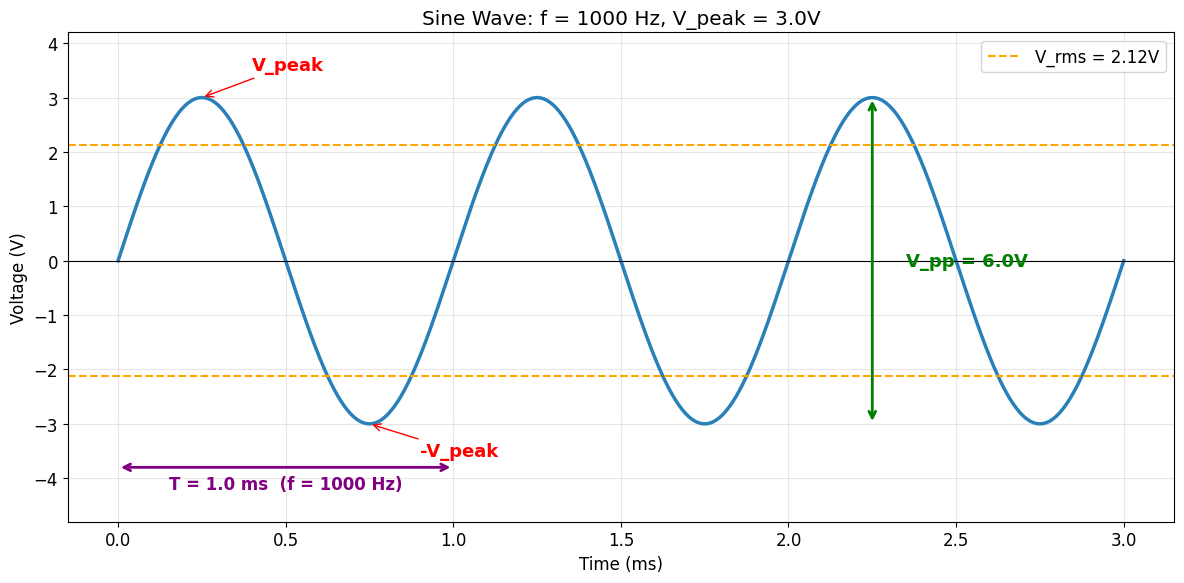

In [9]:
# --- Sine Wave with Labeled Parameters ---

f = 1000  # 1 kHz
T = 1 / f
V_peak = 3.0
t = np.linspace(0, 3 * T, 1000)

v = V_peak * np.sin(2 * np.pi * f * t)

fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(t * 1000, v, color='#2980b9', linewidth=2.5)
ax.axhline(y=0, color='black', linewidth=0.8)

# Annotate peak
ax.annotate('V_peak', xy=(0.25 * T * 1000, V_peak),
            xytext=(0.4 * T * 1000, V_peak + 0.5),
            arrowprops=dict(arrowstyle='->', color='red'),
            fontsize=13, color='red', fontweight='bold')

# Annotate negative peak
ax.annotate('-V_peak', xy=(0.75 * T * 1000, -V_peak),
            xytext=(0.9 * T * 1000, -V_peak - 0.6),
            arrowprops=dict(arrowstyle='->', color='red'),
            fontsize=13, color='red', fontweight='bold')

# Annotate Vpp
ax.annotate('', xy=(2.25 * T * 1000, V_peak), xytext=(2.25 * T * 1000, -V_peak),
            arrowprops=dict(arrowstyle='<->', color='green', lw=2))
ax.text(2.35 * T * 1000, 0, f'V_pp = {2*V_peak}V',
        fontsize=13, color='green', fontweight='bold', va='center')

# Annotate period
ax.annotate('', xy=(0, -V_peak - 0.8), xytext=(T * 1000, -V_peak - 0.8),
            arrowprops=dict(arrowstyle='<->', color='purple', lw=2))
ax.text(T * 1000 / 2, -V_peak - 1.2, f'T = {T*1000:.1f} ms  (f = {f} Hz)',
        fontsize=12, color='purple', fontweight='bold', ha='center')

# RMS line
V_rms = V_peak / np.sqrt(2)
ax.axhline(y=V_rms, color='orange', linestyle='--', linewidth=1.5, label=f'V_rms = {V_rms:.2f}V')
ax.axhline(y=-V_rms, color='orange', linestyle='--', linewidth=1.5)

ax.set_xlabel('Time (ms)')
ax.set_ylabel('Voltage (V)')
ax.set_title(f'Sine Wave: f = {f} Hz, V_peak = {V_peak}V')
ax.set_ylim(-V_peak - 1.8, V_peak + 1.2)
ax.legend(fontsize=12, loc='upper right')
plt.tight_layout()
plt.show()

---
## 3. Frequency and Period

### Concept

**Frequency** ($f$) and **period** ($T$) are inversely related:

$$f = \frac{1}{T} \qquad T = \frac{1}{f}$$

| Frequency | Period | Where you encounter it |
|-----------|--------|------------------------|
| 60 Hz | 16.7 ms | US mains power |
| 1 kHz | 1 ms | Audio tone, test signals |
| 20 kHz | 50 μs | Upper limit of human hearing |
| 1 MHz | 1 μs | AM radio, microcontroller clocks |
| 2.4 GHz | 0.42 ns | Wi-Fi, Bluetooth |

**Angular frequency** ($\omega$) is also common: $\omega = 2\pi f$ (radians per second).

On the oscilloscope, you measure the period directly from the horizontal axis (time division), then calculate frequency.

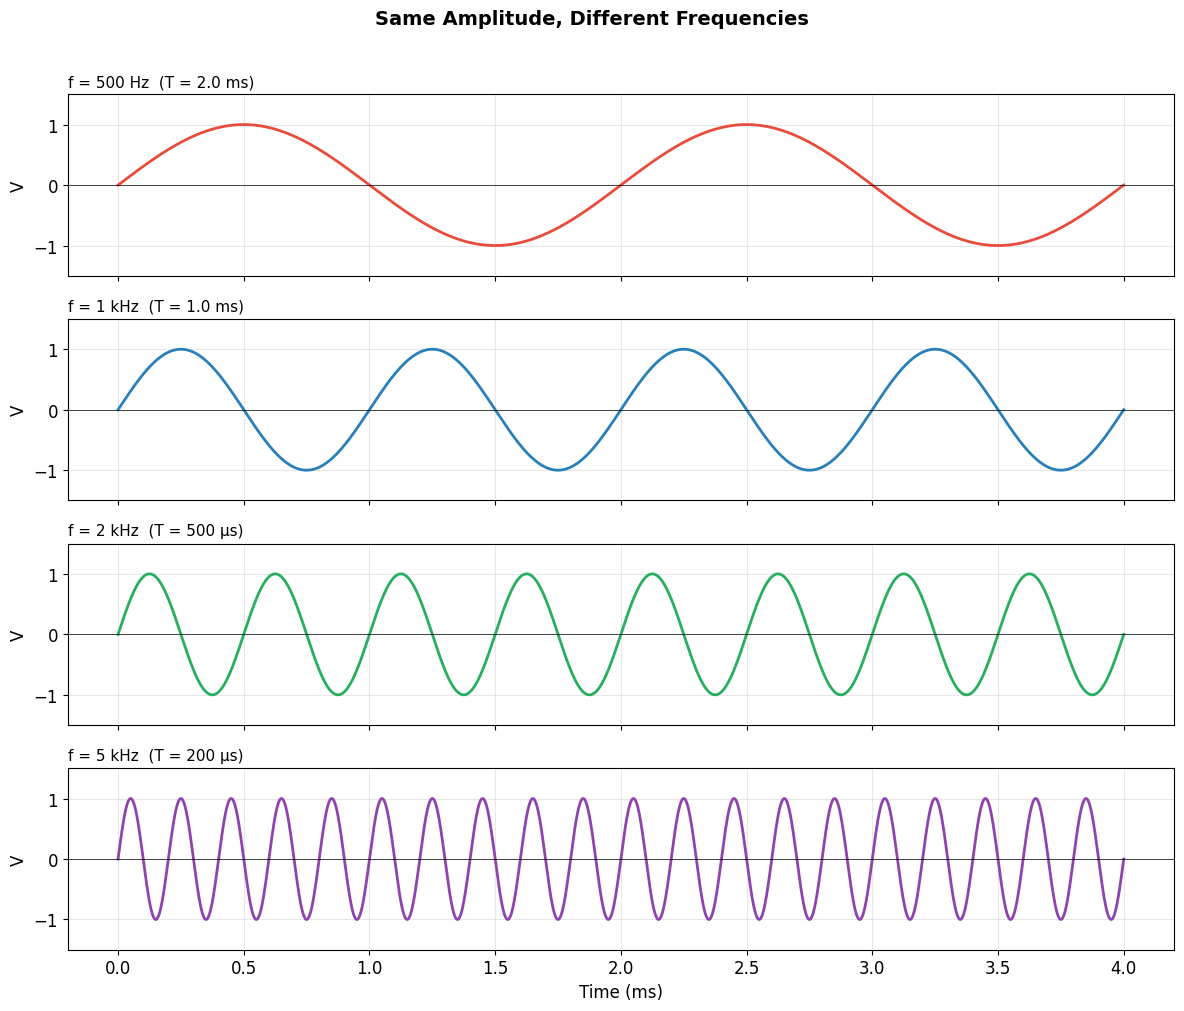

Higher frequency = more cycles in the same time window.
On an oscilloscope, you adjust the time/div to fit the waveform on screen.


In [10]:
# --- Frequency vs Period: Multiple sine waves ---

frequencies = [500, 1000, 2000, 5000]
colors_list = ['#e74c3c', '#2980b9', '#27ae60', '#8e44ad']

fig, axes = plt.subplots(len(frequencies), 1, figsize=(12, 10), sharex=True)

t = np.linspace(0, 0.004, 2000)  # 4 ms window

for ax, f, color in zip(axes, frequencies, colors_list):
    T = 1 / f
    v = np.sin(2 * np.pi * f * t)
    ax.plot(t * 1000, v, color=color, linewidth=2)
    ax.set_ylabel('V')
    ax.set_ylim(-1.5, 1.5)
    ax.axhline(y=0, color='black', linewidth=0.5)
    
    # Label
    if f < 1000:
        f_label = f"{f} Hz"
    else:
        f_label = f"{f/1000:.0f} kHz"
    
    if T * 1000 >= 1:
        T_label = f"T = {T*1000:.1f} ms"
    else:
        T_label = f"T = {T*1e6:.0f} μs"
    
    ax.set_title(f'f = {f_label}  ({T_label})', loc='left', fontsize=11)

axes[-1].set_xlabel('Time (ms)')
fig.suptitle('Same Amplitude, Different Frequencies', fontsize=14, fontweight='bold', y=1.01)
plt.tight_layout()
plt.show()

print("Higher frequency = more cycles in the same time window.")
print("On an oscilloscope, you adjust the time/div to fit the waveform on screen.")

---
## 4. Other Waveforms: Square, Triangle, Sawtooth

### Concept

Sine waves are the purest — they contain only one frequency. Other waveforms are built from combinations of sine waves (Fourier series).

| Waveform | Shape | Where you see it |
|----------|-------|------------------|
| **Square** | Flat top, flat bottom, instant transitions | Digital signals, PWM, clock lines |
| **Triangle** | Linear ramps up and down | Ramp generators, some audio synthesis |
| **Sawtooth** | Linear ramp up, instant drop | CRT scanning, some oscillators |

Your Fnirsi 2C53T signal generator can produce all of these. Each has different harmonic content, which matters for filtering and noise analysis.

### The Material Science Why — Rise Time, Capacitance, and Inductance

A perfect square wave would require truly instantaneous voltage transitions from low to high and back. In reality, real square waves always have **rise time** and **fall time**: the edges are slightly sloped rather than perfectly vertical. Why?

The answer involves two physical phenomena we haven't encountered yet: **capacitance** and **inductance**. Both are fundamental to how circuits behave, especially with changing signals. Here is a first look at each.

#### Capacitance: resistance to voltage change

**Capacitance** is the ability of a structure to store energy in an **electric field**. Any time you have two conductors separated by an insulator (even a tiny air gap), you have capacitance.

A simple way to think about it: imagine a stretchable rubber membrane across a water pipe. Water pressure (voltage) can push the membrane and store energy in its tension, but the membrane takes time to stretch. You can't change the pressure instantly — the membrane absorbs the change gradually.

In a circuit, capacitance means **voltage cannot change instantaneously**. Charge must flow onto the conductors to build up the electric field, and that takes time. The more capacitance, the longer it takes.

A **capacitor** is a component designed to have a specific, useful amount of capacitance. But capacitance also exists where you don't want it — between adjacent wires, between circuit board traces, even between layers inside a chip. This unintentional capacitance is called **parasitic capacitance**.

#### Inductance: resistance to current change

**Inductance** is the ability of a structure to store energy in a **magnetic field**. Any conductor carrying current creates a magnetic field around it. Changing the current means changing the field, and the field pushes back against the change.

Think of a heavy flywheel connected to a water pump. Once water is flowing, the flywheel's momentum keeps it going — you can't stop the flow instantly. And if the water is still, the flywheel's inertia resists starting the flow.

In a circuit, inductance means **current cannot change instantaneously**. The magnetic field stores energy that resists changes in current flow. The more inductance, the stronger the resistance to change.

An **inductor** is a component designed to have a specific inductance (usually a coil of wire). But every straight wire also has a small amount of **parasitic inductance** simply because it carries current and creates a magnetic field.

#### Why this limits rise time

When a square wave tries to transition from low to high:
- **Parasitic capacitance** must be charged up — voltage can't jump instantly
- **Parasitic inductance** resists the sudden change in current needed to charge that capacitance

Together, they turn a theoretically instantaneous edge into a sloped transition that takes real time. The sharper the edges you need, the faster your circuit and measurement equipment need to be able to respond.

> **A note on "bandwidth":** In electronics, **bandwidth** means the range of frequencies a circuit or instrument can handle. An oscilloscope with "100 MHz bandwidth" can accurately display signals up to 100 million cycles per second. This is related to — but different from — everyday uses of the word. Internet "bandwidth" (how much data per second) borrowed the term from electronics, and "personal bandwidth" borrowed it from there. The original meaning is about frequency range: a circuit with more bandwidth can handle faster-changing signals, which is exactly what sharp square wave edges require.

> **Going deeper:** Capacitance and inductance are central to AC circuit analysis. They combine with resistance to form **impedance** — a concept we'll develop through the course as we encounter filters, bypass capacitors, oscillator circuits, and switching transients. For now, the key intuition is: capacitance resists voltage changes, inductance resists current changes, and both are present even when you haven't added any components.

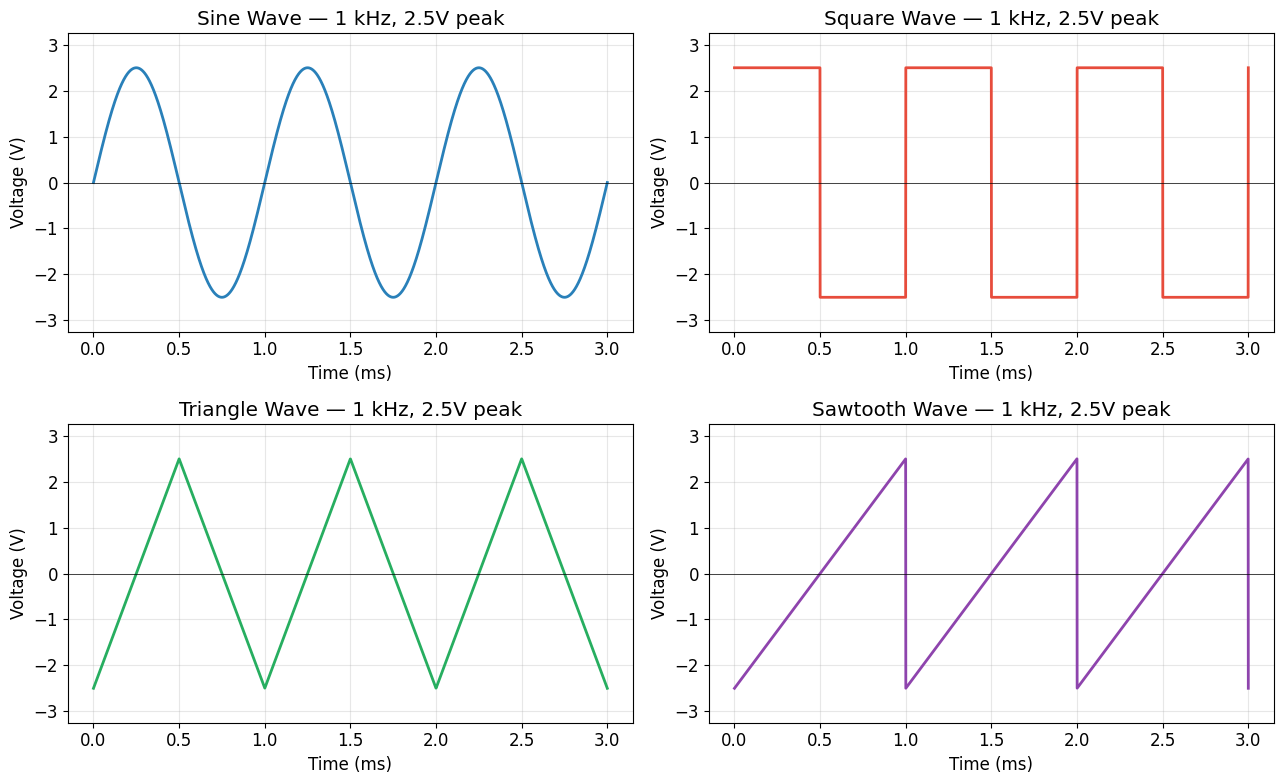

Your signal generator can produce all four of these waveforms.
Try generating each one and observing it on the oscilloscope.


In [11]:
# --- Four Common Waveforms ---

from scipy import signal as sig

f = 1000  # 1 kHz
t = np.linspace(0, 3/f, 3000)
V_peak = 2.5

waveforms = [
    ('Sine',     V_peak * np.sin(2 * np.pi * f * t),        '#2980b9'),
    ('Square',   V_peak * sig.square(2 * np.pi * f * t),    '#e74c3c'),
    ('Triangle', V_peak * sig.sawtooth(2 * np.pi * f * t, width=0.5), '#27ae60'),
    ('Sawtooth', V_peak * sig.sawtooth(2 * np.pi * f * t),  '#8e44ad'),
]

fig, axes = plt.subplots(2, 2, figsize=(13, 8))
axes = axes.flatten()

for ax, (name, wave, color) in zip(axes, waveforms):
    ax.plot(t * 1000, wave, color=color, linewidth=2)
    ax.axhline(y=0, color='black', linewidth=0.5)
    ax.set_xlabel('Time (ms)')
    ax.set_ylabel('Voltage (V)')
    ax.set_title(f'{name} Wave — {f/1000:.0f} kHz, {V_peak}V peak')
    ax.set_ylim(-V_peak * 1.3, V_peak * 1.3)

plt.tight_layout()
plt.show()

print("Your signal generator can produce all four of these waveforms.")
print("Try generating each one and observing it on the oscilloscope.")

---
## 5. RMS Voltage — Why Your Multimeter Reads a Different Number

### The problem

You connect a sine wave to a resistor. The voltage swings positive, then negative, then positive again. Over one full cycle, the **average voltage is exactly zero** — the positive and negative halves cancel perfectly.

But the resistor is clearly getting hot. Energy is being delivered. So the average voltage is useless for describing how much power an AC signal delivers.

We need a single number that answers the question: **"What DC voltage would heat this resistor by the same amount?"**

**Stop and think:** If you were going to invent a way to calculate this, how would you do it? You need a method that captures the "size" of the waveform without letting the positive and negative halves cancel. And it needs to relate to power, not just voltage.

*Think about it for a moment, then read on.*

### First attempt: area under the curve

Your first instinct might be: just ignore the sign. Take the **average of the absolute value** of the voltage — the "area under the curve" divided by the period. For a sine wave with a peak of 1V, this gives:

$$V_{\text{avg}} = \frac{2 \times V_{\text{peak}}}{\pi} \approx 0.637 \times V_{\text{peak}}$$

This is a perfectly valid number, and some meters actually measure this way internally. But here's the problem: **it doesn't correspond to power delivery.**

Why not? Because power isn't proportional to voltage — it's proportional to voltage **squared**:

$$P = \frac{V^2}{R}$$

This means a moment where the voltage is 2V doesn't deliver twice the power of a moment at 1V — it delivers **four times** the power. The peaks of the sine wave contribute disproportionately more heating than the parts near zero. A simple average of |V| doesn't capture this — it treats 2V as only twice as important as 1V, when for power purposes it's four times as important.

### Why squaring is the right move

Since power depends on V², the correct question is: **what is the average power delivered over one cycle?**

$$P_{\text{avg}} = \frac{1}{T} \int_0^T \frac{v(t)^2}{R} \, dt = \frac{1}{R} \times \overline{v^2}$$

where $\overline{v^2}$ is the mean of the squared voltage. Now we can find the equivalent DC voltage: the DC voltage that delivers this same average power must satisfy:

$$\frac{V_{\text{DC}}^2}{R} = \frac{\overline{v^2}}{R}$$

So:

$$V_{\text{DC}} = \sqrt{\overline{v^2}}$$

That's the **Root** of the **Mean** of the **Square** — RMS. The squaring isn't a trick to avoid cancellation (though it does that too). It's there because **power depends on V²**, so averaging V² is what gives you average power. The square root at the end just converts back to voltage units.

### Concrete example

Suppose a sine wave peaks at 10V across a 100Ω resistor.

| Method | Value | Power if used as DC | Correct? |
|--------|-------|-------------------|----------|
| Average of \|V\| | 6.37V | 6.37²/100 = 0.406W | Too low |
| RMS | 7.07V | 7.07²/100 = 0.500W | Correct |
| Peak | 10V | 10²/100 = 1.000W | Too high |

The actual average power is 0.500W (you can verify: the peak instantaneous power is 10²/100 = 1W, and the average of sin²(t) over a cycle is exactly 1/2). Only RMS gives the right answer.

### The name, decoded

**RMS** stands for **Root Mean Square**, and it describes the procedure in reverse order:

1. **Square** every instantaneous voltage value — this gives instantaneous power (times 1/R)
2. **Mean** — average those squared values over one complete cycle — this gives average power (times 1/R)
3. **Root** — take the square root to get back to voltage units

### The formulas

For a **sine wave:**

$$V_{\text{rms}} = \frac{V_{\text{peak}}}{\sqrt{2}} \approx 0.707 \times V_{\text{peak}}$$

$$V_{\text{peak}} = V_{\text{rms}} \times \sqrt{2} \approx 1.414 \times V_{\text{rms}}$$

**This is why 120V mains actually peaks at ~170V.** The "120V" is the RMS value.

For other waveforms, the RMS relationship is different because the shape of the curve changes how the squared values average out:

| Waveform | V_rms / V_peak | Why |
|----------|----------------|-----|
| Sine | $1/\sqrt{2} \approx 0.707$ | Spends most time near zero, less time at peaks |
| Square | $1.000$ | Always at peak — squaring changes nothing |
| Triangle | $1/\sqrt{3} \approx 0.577$ | Linear ramps spend even more time near zero than sine |

A square wave's RMS equals its peak because the voltage is *always* at maximum magnitude — there's nothing to average away. A triangle wave has the lowest RMS-to-peak ratio because it spends so much time at low voltages ramping up and down.

**Important for measurements:** Most multimeters (including the Klein MM300) measure **average-responding, RMS-calibrated** AC voltage. This means they internally measure the average of |V| (the "area under the curve" method), then multiply by a correction factor that converts to RMS — but only correctly **for sine waves.** For square or triangle waves, the correction factor is wrong and the reading will be off. A **True RMS** multimeter actually computes V² internally and gives the correct answer for any waveform shape.

### Datasheet Connection

AC voltage ratings on components (capacitors, transformers, power supplies) are almost always in RMS unless stated otherwise. A capacitor rated for "25V AC" means 25V RMS — the actual peak voltage it sees is 35.4V. Always check whether a datasheet specifies peak or RMS.

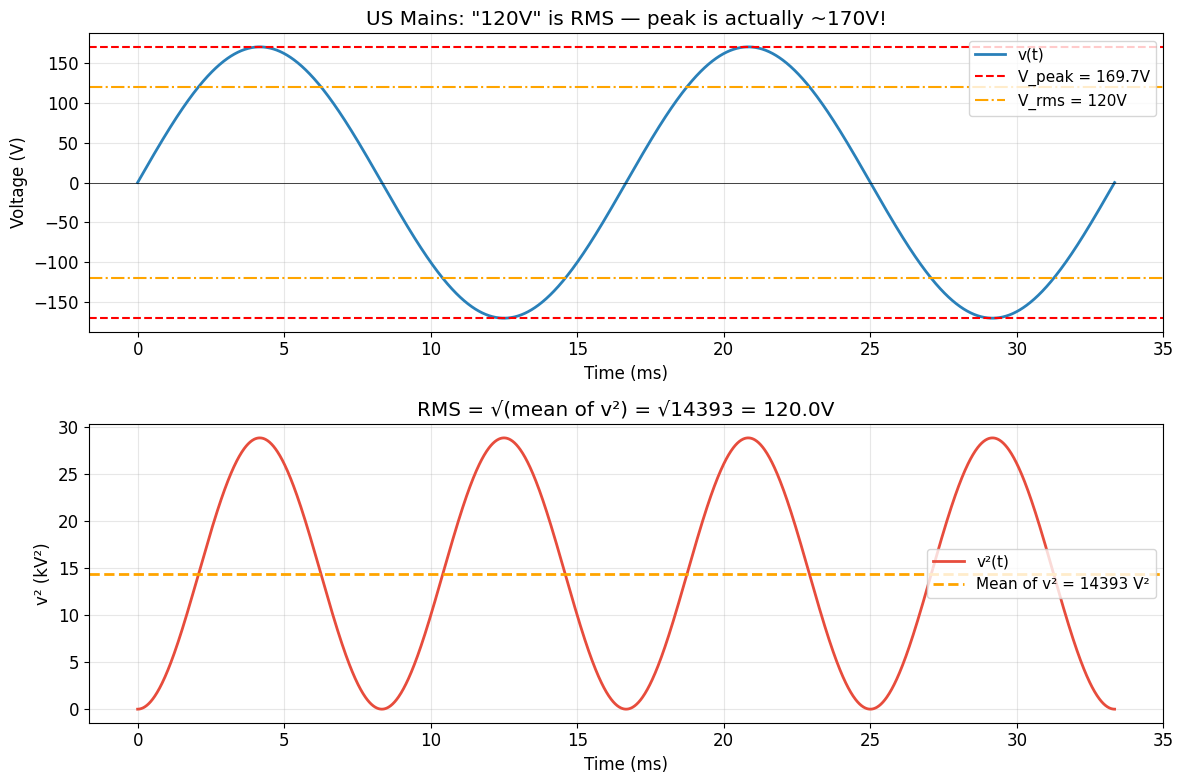

V_rms = V_peak / √2 = 169.7 / 1.414 = 120.0V
This is why RMS is called 'Root Mean Square' — it's the square root of the mean of the squared signal.


In [13]:
# --- RMS vs Peak Visualization ---

f = 60  # 60 Hz mains
t = np.linspace(0, 2/f, 2000)  # 2 full cycles

V_rms = 120  # US mains
V_peak = V_rms * np.sqrt(2)

v = V_peak * np.sin(2 * np.pi * f * t)
v_squared = v**2

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))

# Top: voltage waveform with RMS and peak labeled
ax1.plot(t * 1000, v, color='#2980b9', linewidth=2, label='v(t)')
ax1.axhline(y=V_peak, color='red', linestyle='--', linewidth=1.5, label=f'V_peak = {V_peak:.1f}V')
ax1.axhline(y=-V_peak, color='red', linestyle='--', linewidth=1.5)
ax1.axhline(y=V_rms, color='orange', linestyle='-.', linewidth=1.5, label=f'V_rms = {V_rms}V')
ax1.axhline(y=-V_rms, color='orange', linestyle='-.', linewidth=1.5)
ax1.axhline(y=0, color='black', linewidth=0.5)
ax1.set_xlabel('Time (ms)')
ax1.set_ylabel('Voltage (V)')
ax1.set_title('US Mains: "120V" is RMS — peak is actually ~170V!')
ax1.legend(fontsize=11)

# Bottom: v^2(t) and its mean
ax2.plot(t * 1000, v_squared / 1000, color='#e74c3c', linewidth=2, label='v²(t)')
mean_v2 = np.mean(v_squared)
ax2.axhline(y=mean_v2 / 1000, color='orange', linestyle='--', linewidth=2,
            label=f'Mean of v² = {mean_v2:.0f} V²')
ax2.set_xlabel('Time (ms)')
ax2.set_ylabel('v² (kV²)')
ax2.set_title(f'RMS = √(mean of v²) = √{mean_v2:.0f} = {np.sqrt(mean_v2):.1f}V')
ax2.legend(fontsize=11)

plt.tight_layout()
plt.show()

print(f"V_rms = V_peak / √2 = {V_peak:.1f} / {np.sqrt(2):.3f} = {V_peak/np.sqrt(2):.1f}V")
print(f"This is why RMS is called 'Root Mean Square' — it's the square root of the mean of the squared signal.")

In [14]:
# --- RMS for different waveforms (numerical computation) ---

from scipy import signal as sig

f = 1000
t = np.linspace(0, 10/f, 100000)  # many cycles for accuracy
V_peak = 5.0

waves = {
    'Sine':     V_peak * np.sin(2 * np.pi * f * t),
    'Square':   V_peak * sig.square(2 * np.pi * f * t),
    'Triangle': V_peak * sig.sawtooth(2 * np.pi * f * t, width=0.5),
}

print(f"V_peak = {V_peak}V for all waveforms")
print(f"{'Waveform':<12} {'V_rms (calc)':>12} {'V_rms/V_peak':>14} {'Theory':>10}")
print("-" * 52)

theory = {'Sine': 1/np.sqrt(2), 'Square': 1.0, 'Triangle': 1/np.sqrt(3)}

for name, wave in waves.items():
    rms = np.sqrt(np.mean(wave**2))
    ratio = rms / V_peak
    print(f"{name:<12} {rms:>10.4f} V {ratio:>12.4f} {theory[name]:>10.4f}")

print("\nKey takeaway: A 5V peak square wave delivers more power (higher RMS)")
print("than a 5V peak sine wave. The waveform shape matters!")

V_peak = 5.0V for all waveforms
Waveform     V_rms (calc)   V_rms/V_peak     Theory
----------------------------------------------------
Sine             3.5355 V       0.7071     0.7071
Square           5.0000 V       1.0000     1.0000
Triangle         2.8868 V       0.5774     0.5774

Key takeaway: A 5V peak square wave delivers more power (higher RMS)
than a 5V peak sine wave. The waveform shape matters!


---
## 6. Introduction to the Oscilloscope

### Concept

An oscilloscope is the most important piece of test equipment you'll own. It shows you **voltage vs. time** — it's a window into what's actually happening in your circuit, in real time.

**What the axes mean:**
- **Horizontal axis (X):** Time. Controlled by the **time/div** knob. Each grid square represents a fixed time.
- **Vertical axis (Y):** Voltage. Controlled by the **volts/div** knob. Each grid square represents a fixed voltage.

**Key controls on the Fnirsi 2C53T:**

| Control | What it does |
|---------|-------------|
| **Volts/Div** | Vertical scale — zoom in/out on voltage |
| **Time/Div** | Horizontal scale — zoom in/out on time |
| **Trigger Level** | The voltage at which the scope starts drawing. Stabilizes the display. |
| **Trigger Edge** | Rising or falling — which direction the signal must cross the trigger level |
| **Coupling (AC/DC)** | DC shows everything. AC blocks the DC offset and shows only the changing part. |
| **Channel** | Which input to display |
| **Cursor / Measure** | Built-in measurement tools for frequency, period, Vpp, etc. |

**Triggering** is the #1 thing beginners struggle with. Without a stable trigger, the waveform drifts across the screen. The trigger tells the scope: *"Start drawing when the signal crosses THIS voltage in THIS direction."* Set it near the midpoint of your waveform, on the rising edge.

### AC vs DC Coupling

- **DC coupling:** Shows the complete signal, including any DC offset.
- **AC coupling:** Adds a capacitor in series that blocks DC. Use this when you want to zoom in on a small AC signal riding on top of a large DC offset (e.g., ripple on a 12V power rail).

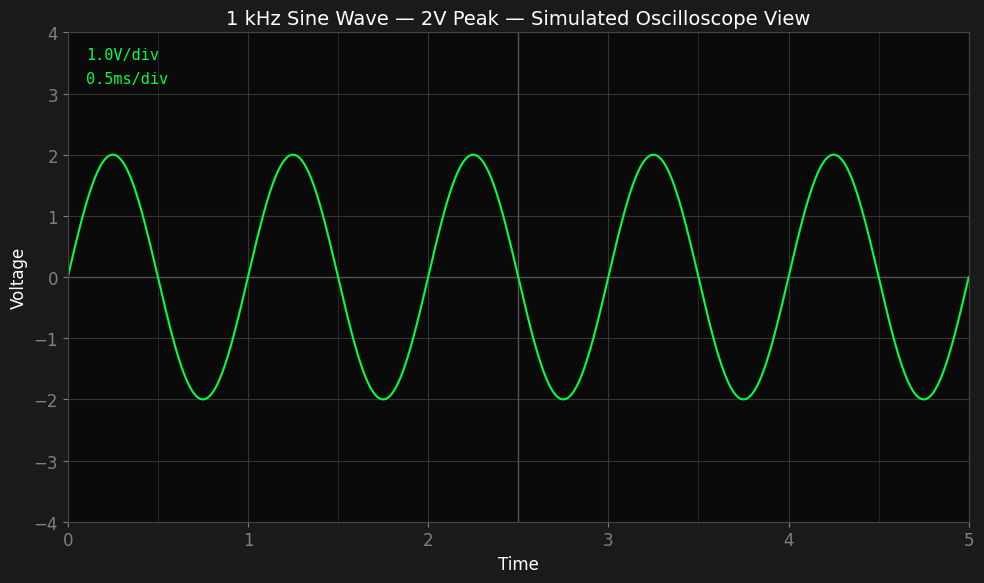

This is what a 1kHz sine wave looks like on an oscilloscope.
Each horizontal box = 0.5ms, each vertical box = 1V.
You can see the period is 1ms (2 divisions), confirming f = 1kHz.


In [15]:
# --- Simulating what an oscilloscope screen looks like ---

def draw_scope_screen(t, v, time_div_ms, volts_div, title, y_offset=0):
    """Simulate an oscilloscope display."""
    fig, ax = plt.subplots(figsize=(10, 6), facecolor='#1a1a1a')
    ax.set_facecolor('#0a0a0a')
    
    # Grid (like scope graticule)
    n_div_x, n_div_y = 10, 8
    x_range = n_div_x * time_div_ms  # total time window in ms
    y_range = n_div_y * volts_div
    
    for i in range(n_div_x + 1):
        ax.axvline(x=i * time_div_ms, color='#333333', linewidth=0.5)
    for i in range(n_div_y + 1):
        ax.axhline(y=-y_range/2 + i * volts_div + y_offset, color='#333333', linewidth=0.5)
    
    # Center crosshair (brighter)
    ax.axhline(y=y_offset, color='#555555', linewidth=1)
    ax.axvline(x=x_range/2, color='#555555', linewidth=1)
    
    # Waveform
    mask = (t * 1000 >= 0) & (t * 1000 <= x_range)
    ax.plot(t[mask] * 1000, v[mask] + y_offset, color='#00ff41', linewidth=1.5)
    
    # Scale labels
    ax.text(0.02, 0.97, f'{volts_div}V/div', transform=ax.transAxes,
            color='#00ff41', fontsize=11, va='top', fontfamily='monospace')
    ax.text(0.02, 0.92, f'{time_div_ms}ms/div', transform=ax.transAxes,
            color='#00ff41', fontsize=11, va='top', fontfamily='monospace')
    
    ax.set_xlim(0, x_range)
    ax.set_ylim(-y_range/2 + y_offset, y_range/2 + y_offset)
    ax.set_xlabel('Time', color='white')
    ax.set_ylabel('Voltage', color='white')
    ax.set_title(title, color='white', fontsize=14)
    ax.tick_params(colors='gray')
    for spine in ax.spines.values():
        spine.set_color('#444444')
    
    plt.tight_layout()
    plt.show()

# 1 kHz sine wave, 2V peak
f = 1000
t = np.linspace(0, 0.01, 10000)
v = 2.0 * np.sin(2 * np.pi * f * t)

draw_scope_screen(t, v, time_div_ms=0.5, volts_div=1.0,
                  title='1 kHz Sine Wave — 2V Peak — Simulated Oscilloscope View')

print("This is what a 1kHz sine wave looks like on an oscilloscope.")
print("Each horizontal box = 0.5ms, each vertical box = 1V.")
print("You can see the period is 1ms (2 divisions), confirming f = 1kHz.")

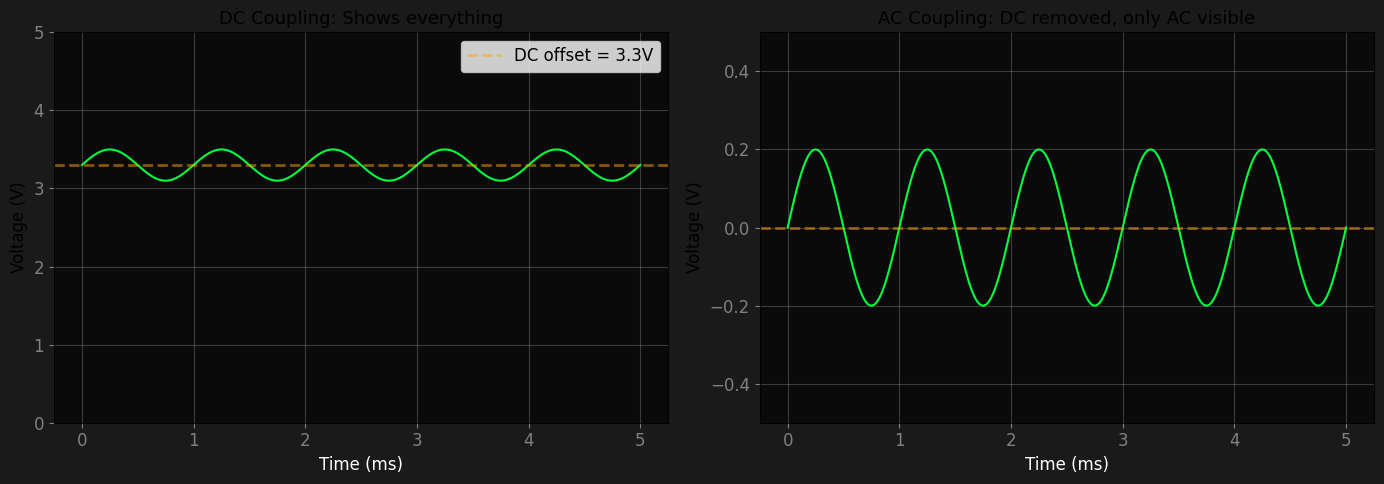

Left (DC coupling): The 200mV signal is hard to see sitting on top of 3.3V.
Right (AC coupling): The DC offset is removed, and we can clearly see the 200mV signal.

Use AC coupling when you need to examine small signals riding on a DC rail.


In [16]:
# --- AC vs DC coupling demo ---

f = 1000
t = np.linspace(0, 0.005, 5000)
dc_offset = 3.3  # 3.3V DC offset
ac_signal = 0.2 * np.sin(2 * np.pi * f * t)  # small 200mV AC signal

v_total = dc_offset + ac_signal

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# DC Coupling
ax1.set_facecolor('#0a0a0a')
ax1.plot(t * 1000, v_total, color='#00ff41', linewidth=1.5)
ax1.axhline(y=dc_offset, color='orange', linestyle='--', alpha=0.5, label=f'DC offset = {dc_offset}V')
ax1.set_xlabel('Time (ms)', color='white')
ax1.set_ylabel('Voltage (V)')
ax1.set_title('DC Coupling: Shows everything', fontsize=13)
ax1.set_ylim(0, 5)
ax1.legend()

# AC Coupling
ax2.set_facecolor('#0a0a0a')
ax2.plot(t * 1000, ac_signal, color='#00ff41', linewidth=1.5)
ax2.axhline(y=0, color='orange', linestyle='--', alpha=0.5)
ax2.set_xlabel('Time (ms)', color='white')
ax2.set_ylabel('Voltage (V)')
ax2.set_title('AC Coupling: DC removed, only AC visible', fontsize=13)
ax2.set_ylim(-0.5, 0.5)

fig.patch.set_facecolor('#1a1a1a')
for ax in [ax1, ax2]:
    ax.tick_params(colors='gray')
plt.tight_layout()
plt.show()

print("Left (DC coupling): The 200mV signal is hard to see sitting on top of 3.3V.")
print("Right (AC coupling): The DC offset is removed, and we can clearly see the 200mV signal.")
print("\nUse AC coupling when you need to examine small signals riding on a DC rail.")

---
## 7. The Signal Generator

### Concept

Your **Fnirsi 2C53T** has a built-in signal generator (the second channel can output waveforms). It can produce:

- **Sine** waves
- **Square** waves (with adjustable duty cycle)
- **Triangle** waves
- **Sawtooth** waves
- Arbitrary waveforms (depending on firmware)

**Key parameters you can set:**
- **Frequency:** How many cycles per second (Hz, kHz, MHz)
- **Amplitude:** The peak voltage of the signal
- **DC Offset:** Shifts the entire signal up or down
- **Duty Cycle:** For square waves — % of the period that's high

The signal generator outputs through the **signal output** BNC connector. Connect this to your oscilloscope input with a BNC cable to observe the generated signal.

### Datasheet Connection

Signal generators are essential for testing circuits. When a component datasheet shows a "frequency response" curve, it was measured by sweeping a signal generator across frequencies and recording the output. **You'll do exactly this when characterizing filters and amplifiers later in the course**.

In [21]:
# --- Interactive waveform viewer (uses ipywidgets) ---

from scipy import signal as sig

try:
    import ipywidgets as widgets
    from IPython.display import display
    HAS_WIDGETS = True
    try:
        ip = get_ipython()
        if not (hasattr(ip, 'kernel') and ip.kernel is not None):
            HAS_WIDGETS = False
    except NameError:
        HAS_WIDGETS = False
except ImportError:
    HAS_WIDGETS = False

def plot_waveform(waveform='Sine', frequency_hz=1000, amplitude_v=2.0, dc_offset_v=0.0):
    f = frequency_hz
    T = 1 / f
    t = np.linspace(0, 4 * T, 4000)
    
    if waveform == 'Sine':
        v = amplitude_v * np.sin(2 * np.pi * f * t)
    elif waveform == 'Square':
        v = amplitude_v * sig.square(2 * np.pi * f * t)
    elif waveform == 'Triangle':
        v = amplitude_v * sig.sawtooth(2 * np.pi * f * t, width=0.5)
    elif waveform == 'Sawtooth':
        v = amplitude_v * sig.sawtooth(2 * np.pi * f * t)
    
    v = v + dc_offset_v
    
    # RMS calculation
    v_rms = np.sqrt(np.mean((v - dc_offset_v)**2))
    
    fig, ax = plt.subplots(figsize=(11, 5))
    
    if T * 1000 >= 1:
        ax.plot(t * 1000, v, color='#2980b9', linewidth=2)
        ax.set_xlabel('Time (ms)')
    else:
        ax.plot(t * 1e6, v, color='#2980b9', linewidth=2)
        ax.set_xlabel('Time (us)')
    
    ax.axhline(y=0, color='black', linewidth=0.5)
    ax.axhline(y=dc_offset_v, color='gray', linestyle=':', alpha=0.5)
    ax.set_ylabel('Voltage (V)')
    ax.set_title(f'{waveform} — f={f}Hz, Amp={amplitude_v}V, DC={dc_offset_v}V, RMS(AC)={v_rms:.3f}V')
    ax.set_ylim(dc_offset_v - amplitude_v * 1.5, dc_offset_v + amplitude_v * 1.5)
    
    plt.tight_layout()
    plt.show()

if HAS_WIDGETS:
    # Frequency: whole numbers, finer steps at low end, coarser at high end
    freq_values = sorted(set(
        list(range(50, 100, 5))         # 50-95 step 5
        + list(range(100, 500, 25))     # 100-475 step 25
        + list(range(500, 2000, 100))   # 500-1900 step 100
        + list(range(2000, 10001, 500)) # 2000-10000 step 500
        + [440]                         # Concert A
    ))

    # Amplitude: decimals, finer steps at low end, coarser at high end
    amp_values = sorted(set(
        [round(x * 0.1, 1) for x in range(1, 10)]    # 0.1-0.9 step 0.1
        + [round(x * 0.5, 1) for x in range(2, 20)]  # 1.0-9.5 step 0.5
        + list(range(10, 50, 2))                       # 10-48 step 2
        + list(range(50, 341, 10))                     # 50-340 step 10
        + [3.3, 170, 325]                              # preset values
    ))

    waveform_dd = widgets.Dropdown(options=['Sine', 'Square', 'Triangle', 'Sawtooth'],
                                    value='Sine', description='Waveform:',
                                    style={'description_width': 'initial'})
    freq_slider = widgets.SelectionSlider(options=[('%d' % v, v) for v in freq_values],
                                           value=1000, description='Freq (Hz):',
                                           style={'description_width': 'initial'},
                                           layout=widgets.Layout(width='400px'))
    amp_slider = widgets.SelectionSlider(options=[('%g' % v, v) for v in amp_values],
                                          value=2.0, description='Amplitude (V):',
                                          style={'description_width': 'initial'},
                                          layout=widgets.Layout(width='400px'))
    offset_slider = widgets.FloatSlider(min=-5.0, max=5.0, step=0.1, value=0.0,
                                         description='DC Offset (V):',
                                         style={'description_width': 'initial'},
                                         layout=widgets.Layout(width='400px'))

    # --- Preset buttons ---
    presets = {
        'USA Mains\n(120V RMS, 60Hz)': ('Sine', 60, 170, 0.0),
        'Europe / China\n(230V RMS, 50Hz)': ('Sine', 50, 325, 0.0),
        'Concert A\n(440Hz tuning ref)': ('Sine', 440, 1.0, 0.0),
        'Digital Logic\n(3.3V clock, 1kHz)': ('Square', 1000, 3.3, 0.0),
    }

    def make_preset_handler(wf, freq, amp, offset):
        def handler(btn):
            waveform_dd.value = wf
            freq_slider.value = freq
            amp_slider.value = amp
            offset_slider.value = offset
        return handler

    preset_buttons = []
    for label, (wf, freq, amp, offset) in presets.items():
        btn = widgets.Button(description=label,
                             layout=widgets.Layout(width='160px', height='50px'),
                             style={'font_size': '10px'})
        btn.on_click(make_preset_handler(wf, freq, amp, offset))
        preset_buttons.append(btn)

    preset_row = widgets.HBox(preset_buttons,
                               layout=widgets.Layout(margin='0 0 8px 0'))

    out = widgets.interactive_output(plot_waveform,
                                      {'waveform': waveform_dd, 'frequency_hz': freq_slider,
                                       'amplitude_v': amp_slider, 'dc_offset_v': offset_slider})
    display(widgets.VBox([preset_row,
                          widgets.HBox([waveform_dd, freq_slider]),
                          widgets.HBox([amp_slider, offset_slider]),
                          out]))
else:
    print("Running in non-interactive mode — showing static examples.")
    for wf in ['Sine', 'Square', 'Triangle']:
        plot_waveform(waveform=wf)

---
## 8. Simulation — Build It in Falstad

[Falstad Circuit Simulator](https://www.falstad.com/circuit/circuitjs.html?ctz=CQAgjCAMB0l3BWcMBMcUHYMGZIA4UA2ATmIxAUgoqoQFMBaMMAKCA) is a free, browser-based tool where you can build circuits and watch current flow in real time. Open a blank canvas and build this:

### AC source with a resistor

**What to build:**
1. Open [Falstad (blank canvas)](https://www.falstad.com/circuit/circuitjs.html?ctz=CQAgjCAMB0l3BWcMBMcUHYMGZIA4UA2ATmIxAUgoqoQFMBaMMAKCA)
2. Right-click → **Draw** → **Inputs and Sources** → **Add AC Voltage Source** — place it vertically
3. Right-click → **Draw** → **Passive Components** → **Add Resistor** — connect it across the source to form a complete loop
4. Click the **AC source** to select it, then edit its properties: set **Frequency** to 60 Hz and **Max Voltage** to 170V (this is US mains peak voltage)

**What to observe:**
- Watch the animated current dots oscillate back and forth — they reverse direction every half-cycle
- Right-click the AC source → **View in New Scope** to see the voltage waveform over time
- Right-click the resistor → **View in New Scope** to see the current waveform — notice it's in phase with the voltage (for a resistor, V and I peak at the same time)
- Try changing the frequency (right-click the source → edit properties) — the dots speed up or slow down, and the scope shows more or fewer cycles in the same time window

**What to try:**
- Change the frequency to 1000 Hz and watch the scope update — you'll need to zoom the scope's time axis to see individual cycles
- Change the resistance value (right-click the resistor) — higher resistance means less current (dimmer dots) but the voltage waveform doesn't change
- Add a second resistor in series and observe how the voltage divides between them — KVL still applies, even with AC

---
## 9. Experiments

### Experiment 1: Observe DC on the Oscilloscope

**Goal:** Get familiar with your oscilloscope by looking at something simple — DC.

**Setup:**
```
Bench Supply (+5V) ──── Oscilloscope CH1 probe tip
Bench Supply (GND)  ──── Oscilloscope CH1 probe ground clip
```

**Steps:**
1. Turn on the Fnirsi 2C53T. Connect the oscilloscope probe to CH1.
2. Set the bench supply to 5.00V DC. Connect probe tip to + and ground clip to −.
3. Set coupling to **DC**.
4. Adjust **Volts/Div** until you can see the trace clearly (try 2V/div).
5. The trace should be a flat horizontal line at 5V.
6. Try changing the supply voltage (3V, 7V, 10V) — the line should move up and down.
7. Switch to **AC coupling** — the line should jump to 0V (the DC is blocked).

**Expected:** A flat horizontal line. If it wobbles, you might be picking up 60Hz mains noise — this is normal for unshielded probes.

---

### Experiment 2: Generate and Observe a Sine Wave

**Goal:** Use the signal generator and measure the waveform on the oscilloscope.

**Setup:**
```
Fnirsi 2C53T Signal Output ──── BNC cable ──── Oscilloscope CH1 Input
```

**Steps:**
1. On the Fnirsi 2C53T, access the signal generator function.
2. Set it to output a **sine wave** at **1 kHz**, **2V peak-to-peak** (1V amplitude), **0V DC offset**.
3. Connect the signal output to CH1 input using a BNC cable.
4. Set oscilloscope: **Time/Div = 500μs/div**, **Volts/Div = 500mV/div**, **DC coupling**.
5. Adjust the **trigger level** to approximately 0V, **rising edge**.
6. You should see a clean sine wave.

**Measurements to record:**
- Count the divisions for one full cycle → calculate period and frequency
- Count the divisions from peak to trough → calculate V_pp and V_peak
- Use the scope's built-in measurement function to verify

---

### Experiment 3: Measure Frequency, Amplitude, and Period

**Goal:** Practice reading the oscilloscope accurately.

**Steps:**
1. Generate these waveforms one at a time and measure each:

| Waveform | Frequency | V_pp |
|----------|-----------|------|
| Sine | 500 Hz | 3.0V |
| Square | 2 kHz | 4.0V |
| Triangle | 10 kHz | 2.0V |

2. For each, manually read from the graticule:
   - Period (horizontal divisions × time/div)
   - V_pp (vertical divisions × volts/div)
3. Compare with the scope's auto-measurement.

**Expected:**
- 500 Hz → T = 2 ms
- 2 kHz → T = 500 μs
- 10 kHz → T = 100 μs

---

### Experiment 4: Compare Oscilloscope to Multimeter (RMS)

**Goal:** See the difference between peak/Vpp (oscilloscope) and RMS (multimeter).

**Setup:**
```
Signal Generator ──┬── Oscilloscope CH1
                   └── Multimeter (AC Voltage mode)
```

**Steps:**
1. Generate a 1 kHz sine wave at 5V peak-to-peak (2.5V peak).
2. Connect to both the oscilloscope and the multimeter simultaneously.
3. Read the oscilloscope: you should see **5V peak-to-peak**.
4. Read the multimeter (set to AC V): it should show approximately **1.77V**.

**Why?** The multimeter reads RMS:
$$V_{\text{rms}} = \frac{V_{\text{peak}}}{\sqrt{2}} = \frac{2.5}{1.414} \approx 1.77\text{V}$$

5. Now switch the signal generator to a **square wave** at the same 5Vpp.
6. Oscilloscope still shows 5Vpp.
7. The multimeter will read approximately **2.5V** (but may be inaccurate because the Klein MM300 is average-responding, not true RMS — it's calibrated for sine waves only).

**Key insight:** The oscilloscope shows you the true waveform. The multimeter gives you a single number (RMS) that's only accurate for sine waves unless it's a true-RMS meter.

In [ ]:
# --- Expected measurements for Experiment 4 ---

V_pp = 5.0
V_peak = V_pp / 2
V_rms_sine = V_peak / np.sqrt(2)
V_rms_square = V_peak  # square wave RMS = peak

print("Experiment 4: Expected Readings")
print("=" * 50)
print(f"Signal: {V_pp}V peak-to-peak, 1kHz")
print()
print(f"{'':20} {'Oscilloscope':>14} {'Multimeter (AC)':>16}")
print("-" * 50)
print(f"{'Sine wave':<20} {V_pp:>10.2f} Vpp  {V_rms_sine:>12.3f} Vrms")
print(f"{'Square wave':<20} {V_pp:>10.2f} Vpp  {V_rms_square:>12.3f} Vrms*")
print()
print("* The Klein MM300 reading for square waves will be inaccurate")
print("  because it's an average-responding meter calibrated for sine waves.")
print(f"  It may read ~{V_rms_square * 0.9:.2f}V instead of the true {V_rms_square:.2f}V.")

---
## 10. Putting It Together: Reading a Real Signal

Here's a systematic approach to measuring any unknown signal on the oscilloscope:

1. **Connect the probe.** Probe tip to signal, ground clip to circuit ground.
2. **Set DC coupling** (start here; switch to AC later if needed).
3. **Press AUTO** to let the scope find the signal (good starting point).
4. **Adjust Time/Div** to show 2-3 complete cycles.
5. **Adjust Volts/Div** so the waveform fills most of the screen vertically.
6. **Set the trigger** to the midpoint of the waveform, rising edge.
7. **Read the measurements:**
   - Period: count horizontal divisions for one cycle × time/div
   - Frequency: 1 / period
   - V_pp: count vertical divisions from trough to peak × volts/div
   - DC offset: where is the center of the waveform relative to 0V?

In [ ]:
# --- Practice: Read this "oscilloscope screen" ---

# Mystery signal — try to determine f, Vpp, and Vrms before running the answer cell below

np.random.seed(7)
f_mystery = 2500  # Hz
V_peak_mystery = 1.8
dc_offset_mystery = 0.5

t = np.linspace(0, 0.004, 10000)  # 4ms window
v = dc_offset_mystery + V_peak_mystery * np.sin(2 * np.pi * f_mystery * t)
v += 0.03 * np.random.randn(len(t))  # add some realistic noise

fig, ax = plt.subplots(figsize=(11, 6), facecolor='#1a1a1a')
ax.set_facecolor('#0a0a0a')

# Graticule
time_div = 0.5  # ms
volts_div = 1.0  # V
for i in range(9):
    ax.axvline(x=i * time_div, color='#333333', linewidth=0.5)
for vv in np.arange(-3, 4, volts_div):
    ax.axhline(y=vv, color='#333333', linewidth=0.5)

ax.axhline(y=0, color='#555555', linewidth=1)
ax.axvline(x=2.0, color='#555555', linewidth=1)

ax.plot(t * 1000, v, color='#00ff41', linewidth=1)

ax.text(0.02, 0.97, f'{volts_div}V/div', transform=ax.transAxes,
        color='#00ff41', fontsize=11, va='top', fontfamily='monospace')
ax.text(0.02, 0.92, f'{time_div}ms/div', transform=ax.transAxes,
        color='#00ff41', fontsize=11, va='top', fontfamily='monospace')

ax.set_xlim(0, 4)
ax.set_ylim(-3, 3)
ax.set_xlabel('Time', color='white')
ax.set_ylabel('Voltage', color='white')
ax.set_title('Mystery Signal — What are f, Vpp, V_rms, and DC offset?',
             color='white', fontsize=13)
ax.tick_params(colors='gray')
for spine in ax.spines.values():
    spine.set_color('#444444')

plt.tight_layout()
plt.show()

print("Study the oscilloscope display above.")
print("Try to determine: frequency, Vpp, Vpeak, Vrms, and DC offset.")
print("Then run the next cell to check your answers.")

In [ ]:
# --- Answers for the mystery signal ---

T_ms = 1 / f_mystery * 1000
V_pp = 2 * V_peak_mystery
V_rms = V_peak_mystery / np.sqrt(2)

print("=" * 50)
print("MYSTERY SIGNAL ANSWERS")
print("=" * 50)
print(f"  Period:     {T_ms:.2f} ms  (= {T_ms/time_div:.1f} horizontal divisions × {time_div}ms/div)")
print(f"  Frequency:  {f_mystery} Hz  (= 1 / {T_ms:.4f}ms)")
print(f"  V_peak:     {V_peak_mystery} V")
print(f"  V_pp:       {V_pp} V  (= {V_pp/volts_div:.1f} vertical divisions × {volts_div}V/div)")
print(f"  DC offset:  {dc_offset_mystery} V  (center of waveform is above 0V)")
print(f"  V_rms (AC): {V_rms:.3f} V  (of the AC component only)")
print()
print("How to read it:")
print(f"  - One full cycle spans {T_ms/time_div:.1f} divisions × {time_div}ms = {T_ms}ms")
print(f"  - Peak to trough spans {V_pp/volts_div:.1f} divisions × {volts_div}V = {V_pp}V")
print(f"  - The waveform is centered around {dc_offset_mystery}V, not 0V → DC offset")

---
## Checkpoint Questions

**Q1:** A sine wave has a peak-to-peak voltage of 10V. What is V_peak? What is V_rms?

**Q2:** You see a waveform on your oscilloscope that completes one cycle every 4 divisions, and the time/div is set to 250μs. What is the frequency?

**Q3:** Your multimeter reads 3.54V AC on a sine wave. What is the peak voltage? What is V_pp?

**Q4:** You connect your bench supply (set to 9V DC) to the oscilloscope with AC coupling. What do you see? Why?

**Q5:** A square wave has a peak voltage of 3.3V (swings from 0V to 3.3V). What is its RMS voltage? Would a standard (non-true-RMS) multimeter read this correctly?

In [ ]:
# --- Checkpoint Answers (run to reveal) ---

print("=" * 60)
print("CHECKPOINT ANSWERS")
print("=" * 60)

# Q1
print(f"\nQ1: V_pp = 10V")
print(f"    V_peak = V_pp / 2 = 5V")
print(f"    V_rms = V_peak / sqrt(2) = 5 / 1.414 = {5/np.sqrt(2):.3f}V")

# Q2
T_q2 = 4 * 250e-6  # 4 divisions × 250μs
f_q2 = 1 / T_q2
print(f"\nQ2: Period = 4 × 250μs = {T_q2*1e6:.0f}μs = {T_q2*1000:.0f}ms")
print(f"    Frequency = 1 / {T_q2*1000:.0f}ms = {f_q2:.0f} Hz = {f_q2/1000:.0f} kHz")

# Q3
V_rms_q3 = 3.54
V_peak_q3 = V_rms_q3 * np.sqrt(2)
V_pp_q3 = 2 * V_peak_q3
print(f"\nQ3: V_rms = 3.54V (multimeter reading)")
print(f"    V_peak = V_rms × sqrt(2) = 3.54 × 1.414 = {V_peak_q3:.2f}V")
print(f"    V_pp = 2 × V_peak = {V_pp_q3:.2f}V")

# Q4
print(f"\nQ4: You see a flat line at 0V (or very close to it).")
print(f"    AC coupling blocks DC. Since the bench supply outputs pure DC")
print(f"    with no AC component, there's nothing left to display.")
print(f"    (You might see a tiny bit of noise/ripple.)")

# Q5
# Square wave from 0 to 3.3V → mean = 1.65V, AC amplitude = 1.65V
# For 50% duty cycle square: V_rms = V_peak (of the full swing from 0 to 3.3)
# Actually: RMS of 0-to-3.3V square = sqrt(mean(v^2)) = sqrt(0.5 * 0^2 + 0.5 * 3.3^2)
v_sq = np.array([0, 3.3])
rms_sq = np.sqrt(0.5 * 0**2 + 0.5 * 3.3**2)
print(f"\nQ5: Square wave 0V to 3.3V (50% duty cycle)")
print(f"    V_rms = sqrt(0.5 × 0² + 0.5 × 3.3²) = sqrt({0.5*3.3**2:.4f}) = {rms_sq:.3f}V")
print(f"    A non-true-RMS multimeter will give an INCORRECT reading because")
print(f"    it assumes a sine wave shape. The error depends on the meter's")
print(f"    averaging method, but it will typically read ~10% off.")

---

## Summary

| Concept | Key Point |
|---------|----------|
| DC | Constant voltage/current. Batteries, bench supplies, regulators. |
| AC | Periodically reversing. Described by amplitude, frequency, period. |
| Sine wave | $v(t) = V_p \sin(2\pi ft)$. Fundamental waveform. |
| Frequency/Period | $f = 1/T$. Higher frequency = shorter period. |
| RMS | $V_{rms} = V_p / \sqrt{2}$ (sine only). DC-equivalent heating value. |
| Oscilloscope | Shows voltage vs time. Use triggering to stabilize display. |
| AC/DC coupling | DC shows all. AC blocks DC offset. |
| Signal generator | Produces test waveforms: sine, square, triangle, sawtooth. |
| Multimeter AC | Reads RMS, but only accurate for sine waves (unless true-RMS). |

**Next up:** We'll start using these fundamentals to build real circuits with components — resistors, capacitors, and eventually semiconductors.